In [20]:
import torch

In [21]:
float_32=torch.tensor([3.0,6.0,9.0],
                      dtype=torch.float32,
                      device='cpu',
                      requires_grad=False)
float_16=float_32.type(torch.float16)

In [22]:
float_mix=float_16*float_32
float_mix.dtype

torch.float32

In [23]:
tensor=torch.rand(3,2)

In [24]:
tensor

tensor([[0.4668, 0.9583],
        [0.9396, 0.8561],
        [0.0922, 0.2942]])

In [25]:
torch.matmul(tensor,tensor.reshape(2,3))

tensor([[1.0382, 0.5356, 0.7205],
        [1.1714, 0.9793, 1.1347],
        [0.2949, 0.1155, 0.1732]])

In [26]:
x=torch.arange(0,100,10)

In [27]:
torch.manual_seed(42)

## Pytorch Workflow Fundamentals

In [28]:
import torch

In [29]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [30]:
W=0.7
b=0.9
X=torch.arange(0,1,0.01).unsqueeze(1)
Y=(X*W)+b
X.shape,Y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def plotPredictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    y_pred=None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(x=X_train.squeeze(),y=y_train.squeeze(),c='black',s=10,label="Training Data")
    plt.scatter(x=X_test.squeeze(),y=y_test.squeeze(),c='orange',s=10,label="Training Data")
    if y_pred is not None:
        plt.scatter(x=X_test.squeeze(),y=y_pred.squeeze(),c='blue',s=10,label="Predictions")
    plt.legend()

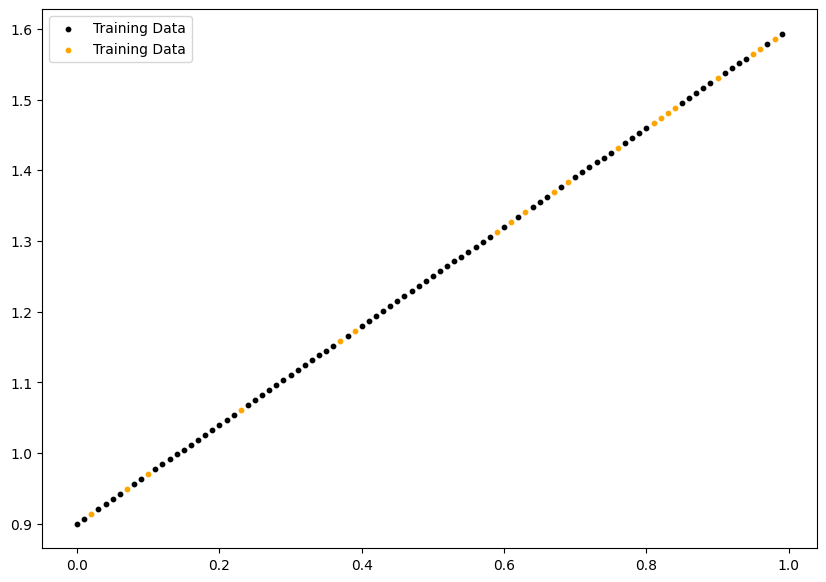

In [34]:
plotPredictions()

## Build Model

In [35]:
from torch import nn

In [36]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,
                                            dtype=float,
                                            requires_grad=True))
        self.bais=nn.Parameter(torch.randn(1,
                                           dtype=float,
                                           requires_grad=True))
    def forward(self,X:torch.Tensor) -> torch.Tensor:
        return (self.weight*X)+self.bais

In [37]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())
print(model_0.state_dict())

OrderedDict({'weight': tensor([0.3367], dtype=torch.float64), 'bais': tensor([0.1288], dtype=torch.float64)})


In [38]:
with torch.inference_mode():
    y_pred=model_0(X_test)
y_pred[:10]

tensor([[0.3342],
        [0.4083],
        [0.4588],
        [0.3544],
        [0.4116],
        [0.2062],
        [0.3847],
        [0.3611],
        [0.4487],
        [0.4318]], dtype=torch.float64)

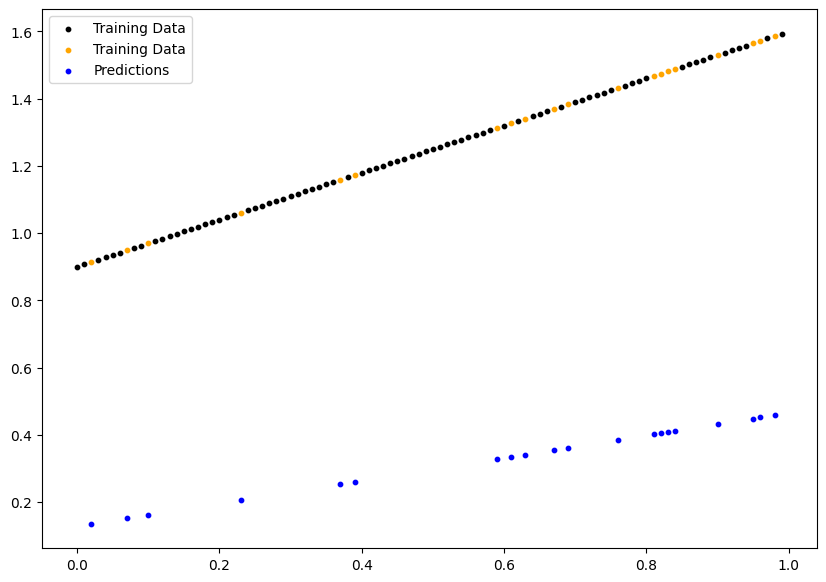

In [39]:
plotPredictions(y_pred=y_pred)

In [40]:
epoch_count=[]
train_loss_list=[]
test_loss_list=[]


loss_fn=nn.L1Loss()
optim=torch.optim.SGD(model_0.parameters(),lr=0.01)
epochs=300

for epoch in range(epochs):
    model_0.train()

    optim.zero_grad()

    y_train_pred=model_0(X_train)

    train_loss=loss_fn(y_train_pred,y_train)

    train_loss.backward()

    optim.step()

    

    if epoch%20==0:
        model_0.eval()

        with torch.inference_mode():
            test_pred=model_0(X_test)

        test_loss=loss_fn(test_pred,y_test)
        
        epoch_count.append(epoch)
        train_loss_list.append(train_loss.detach().numpy())
        test_loss_list.append(test_loss.detach().numpy())
        print(f"{epoch}: Train MAE: {train_loss}, Test MAE : {test_loss}")


0: Train MAE: 0.9404928649565172, Test MAE : 0.9803254945542491
20: Train MAE: 0.6970616651620575, Test MAE : 0.7233802949549498
40: Train MAE: 0.4536304653675979, Test MAE : 0.4664350953556508
60: Train MAE: 0.21019926557313826, Test MAE : 0.20948989575635163
80: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
100: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
120: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
140: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
160: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
180: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
200: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
220: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
240: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
260: Train MAE: 0.008888814241875397, Test MAE : 0.003933736076912314
280: Train MAE: 0.008888814241875397, Te

In [41]:
def draw_loss(train_loss_list,test_loss_list):
    plt.figure(figsize=(10,7))
    plt.plot(epoch_count,train_loss_list,c='orange',label='Training Loss')
    plt.plot(epoch_count,test_loss_list,c='black',label='Testing Loss')
    plt.legend()

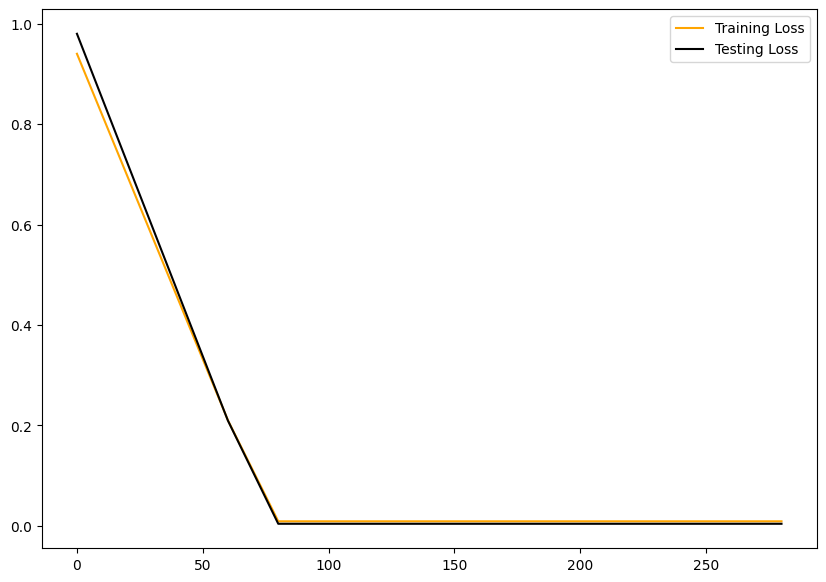

In [42]:
draw_loss(train_loss_list,test_loss_list)

In [43]:
## learned Params
model_0.state_dict()

OrderedDict([('weight', tensor([0.7002], dtype=torch.float64)),
             ('bais', tensor([0.9088], dtype=torch.float64))])

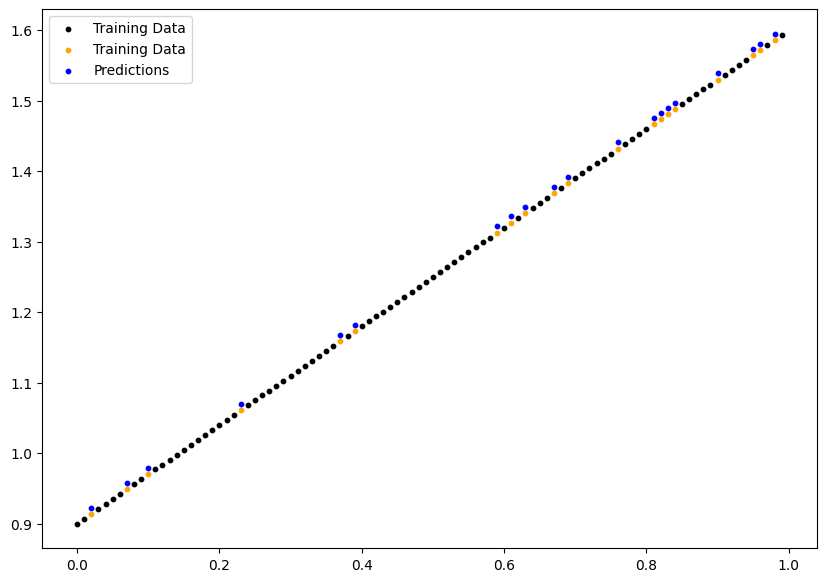

In [44]:
with torch.inference_mode():
    y_pred=model_0(X_test)
plotPredictions(y_pred=y_pred)

In [45]:
from pathlib import Path

MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

## Classification

In [76]:
import torch
import matplotlib.pyplot as plt

In [77]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Q1

Make a binary classification dataset with Scikit-Learn's make_moons() function.

    For consistency, the dataset should have 1000 samples and a random_state=42.
    Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.


In [144]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [145]:
RANDOM_STATE=42

In [146]:
X,y=make_moons(n_samples=1000,random_state=RANDOM_STATE)

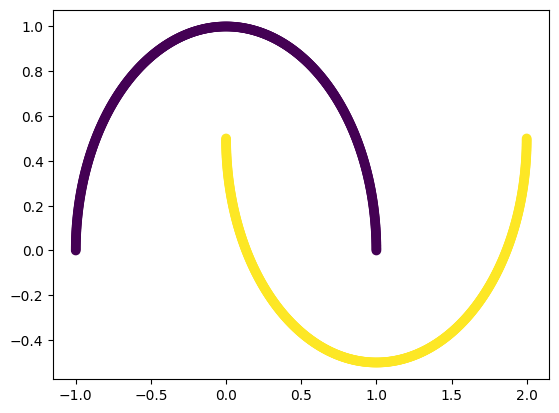

In [147]:
plt.scatter(X[:,0],X[:,1],c=y)

In [148]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
print(f"Type of X {X.dtype} | Type of y {y.dtype}")

Type of X torch.float32 | Type of y torch.float32


In [149]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=RANDOM_STATE,test_size=0.2)

In [150]:
INPUT=X.shape[1]

In [151]:
from torch import nn
class MoonClassV1(nn.Module):
    
    def __init__(self,input_feature,hidden_features,output_features):
        super().__init__()
        self.seq_layers=nn.Sequential(
                        nn.Linear(in_features=input_feature,out_features=hidden_features),
                        nn.ReLU(),
                        nn.Linear(in_features=hidden_features,out_features=hidden_features),
                        nn.ReLU(),
                        nn.Linear(in_features=hidden_features,out_features=hidden_features),
                        nn.ReLU(),
                        nn.Linear(in_features=hidden_features,out_features=output_features)
                        )

    def forward(self,x):
        return self.seq_layers(x)
model_4=MoonClassV1(input_feature=2,hidden_features=10,output_features=1).to(device)
model_4

MoonClassV1(
  (seq_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [152]:
loss_fn=nn.BCEWithLogitsLoss()
optim=torch.optim.SGD(model_4.parameters(),
                      lr=0.1)

In [153]:
# def accuracy_fn(y_test,y_pred):
#     y_test=y_test
#     y_pred=y_pred
#     return sum(y_test==y_pred)/(y_test.shape[0]+y_pred.shape[0])
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [155]:
epoch_count=[]
train_loss_list=[]
test_loss_list=[]

epochs=1000
for epoch in range(epochs):
    model_4.train()

    y_logits=model_4(X_train).squeeze(dim=1)
    y_train_pred=torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_train)

    accuracy_train=accuracy_fn(y_train,y_train_pred)

    optim.zero_grad()

    loss.backward()

    optim.step()

    # testing
    model_4.eval()

    with torch.inference_mode():
        y_test_logits=model_4(X_test).squeeze(dim=1)
        y_test_pred=torch.round(torch.sigmoid(y_test_logits))

        loss_test=loss_fn(y_test_logits,y_test)

        accuracy_test=accuracy_fn(y_test,y_test_pred)

    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_list.append(loss.detach().numpy())
        test_loss_list.append(loss_test.detach().numpy())
        print(f"{epoch}: Train_loss: {loss} | Train_acc: {accuracy_train} | Test_loss: {loss_test} | Test_acc: {accuracy_test}")





0: Train_loss: 0.7028446197509766 | Train_acc: 50.0 | Test_loss: 0.7017712593078613 | Test_acc: 50.0
10: Train_loss: 0.6923766136169434 | Train_acc: 50.0 | Test_loss: 0.6923398375511169 | Test_acc: 50.0
20: Train_loss: 0.6834291815757751 | Train_acc: 66.875 | Test_loss: 0.6841877102851868 | Test_acc: 61.5
30: Train_loss: 0.6733468770980835 | Train_acc: 72.5 | Test_loss: 0.6749029755592346 | Test_acc: 68.0
40: Train_loss: 0.6599600315093994 | Train_acc: 78.25 | Test_loss: 0.6625420451164246 | Test_acc: 75.5
50: Train_loss: 0.641018271446228 | Train_acc: 78.875 | Test_loss: 0.6449383497238159 | Test_acc: 76.0
60: Train_loss: 0.6135632991790771 | Train_acc: 79.375 | Test_loss: 0.6193956732749939 | Test_acc: 76.0
70: Train_loss: 0.5750464797019958 | Train_acc: 79.25 | Test_loss: 0.5836650133132935 | Test_acc: 77.0
80: Train_loss: 0.5273573398590088 | Train_acc: 79.375 | Test_loss: 0.5398254990577698 | Test_acc: 79.0
90: Train_loss: 0.4768719971179962 | Train_acc: 80.125 | Test_loss: 0.4935

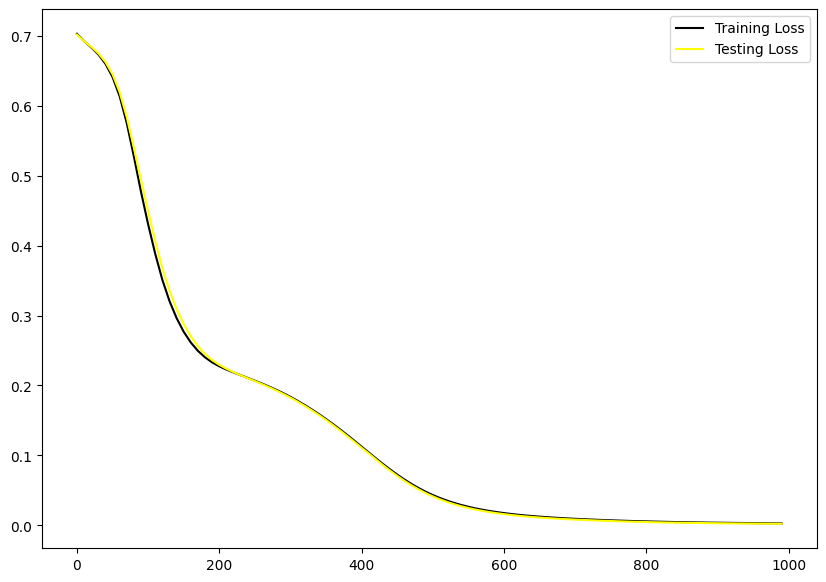

In [159]:
fig=plt.figure(figsize=(10,7))
plt.plot(epoch_count,train_loss_list,c='black',label='Training Loss')
plt.plot(epoch_count,test_loss_list,c='yellow',label='Testing Loss')
plt.legend()


In [160]:
import numpy as np

In [163]:
def plot_boundary(model: torch.nn.Module,X:torch.Tensor,y:torch.Tensor):
    
    model.to('cpu')
    X, y=X.to('cpu'),y.to('cpu')

    x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,101),np.linspace(y_min,y_max,101))

    X_to_y_pred=torch.from_numpy(np.column_stack((xx.ravel(),yy.ravel()))).type(torch.float)

    with torch.inference_mode():
        y_logits=model(X_to_y_pred)

    if len(torch.unique(y))>2:
        y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
    else:
        y_pred=torch.round(torch.sigmoid(y_logits))


    y_pred=y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)



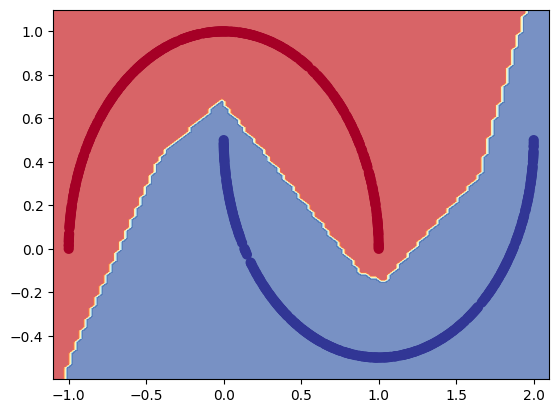

In [164]:
plot_boundary(model_4,X_train,y_train)

In [165]:
def tan_h(logits):
    return (torch.exp(logits)-torch.exp(-logits))/(torch.exp(logits)+torch.exp(-logits))

## Multi Classification

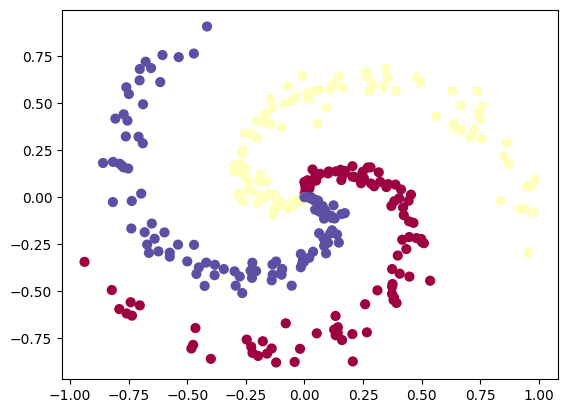

In [294]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [295]:
np.unique(y)

array([0, 1, 2], dtype=uint8)

In [296]:
NUM_CLASSES=len(np.unique(y))
NUM_FEATURES=X.shape[1]

In [297]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)
X_train,X_test=torch.from_numpy(X_train).type(torch.float).to(device),torch.from_numpy(X_test).type(torch.float).to(device)
y_train,y_test=torch.from_numpy(y_train).type(torch.LongTensor).to(device),torch.from_numpy(y_test).type(torch.LongTensor).to(device)

In [298]:
class MultiClass(nn.Module):
    def __init__(self, input_features,hidden_neurons,output_feature):
        super().__init__()
        self.seq_layer=nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons,out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons,out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons,out_features=output_feature),
        )

    def forward(self,x):
        return self.seq_layer(x)

In [299]:
model_5=MultiClass(input_features=NUM_FEATURES,hidden_neurons=10,output_feature=NUM_CLASSES).to(device)
model_5

MultiClass(
  (seq_layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [300]:
loss_fn=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model_5.parameters(),lr=0.1)

In [301]:
type(X_test)

torch.Tensor

In [302]:
epoch_count=[]
train_loss_list=[]
test_loss_list=[]

epochs=200

for epoch in range(epochs):

    model_5.train()

    y_logits=model_5(X_train)
    y_train_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

    loss=loss_fn(y_logits,y_train)
    accuracy_train=accuracy_fn(y_train,y_train_pred)

    optim.zero_grad()

    loss.backward()

    optim.step()

    # testing

    model_5.eval()

    with torch.inference_mode():
        y_test_logits=model_5(X_test)
        y_test_pred=torch.softmax(y_test_logits,dim=1).argmax(dim=1)

        loss_test=loss_fn(y_test_logits,y_test)
        accuracy_test=accuracy_fn(y_test,y_test_pred)

        
    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_list.append(loss.detach().numpy())
        test_loss_list.append(loss_test.detach().numpy())
        print(f"{epoch}: Train_loss: {loss} | Train_acc: {accuracy_train} | Test_loss: {loss_test} | Test_acc: {accuracy_test}")

0: Train_loss: 1.0999644994735718 | Train_acc: 32.5 | Test_loss: 1.164074182510376 | Test_acc: 26.666666666666668
10: Train_loss: 0.707125723361969 | Train_acc: 61.25000000000001 | Test_loss: 0.7514070272445679 | Test_acc: 60.0
20: Train_loss: 0.35417014360427856 | Train_acc: 80.41666666666667 | Test_loss: 0.4236952066421509 | Test_acc: 83.33333333333334
30: Train_loss: 0.1073695495724678 | Train_acc: 97.5 | Test_loss: 0.076918825507164 | Test_acc: 98.33333333333333
40: Train_loss: 0.05329030379652977 | Train_acc: 97.5 | Test_loss: 0.015403428114950657 | Test_acc: 100.0
50: Train_loss: 0.04449461027979851 | Train_acc: 97.91666666666666 | Test_loss: 0.010325643233954906 | Test_acc: 100.0
60: Train_loss: 0.036408018320798874 | Train_acc: 98.75 | Test_loss: 0.03147875890135765 | Test_acc: 98.33333333333333
70: Train_loss: 0.025289708748459816 | Train_acc: 98.75 | Test_loss: 0.006066794041544199 | Test_acc: 100.0
80: Train_loss: 0.02285327948629856 | Train_acc: 99.16666666666667 | Test_los

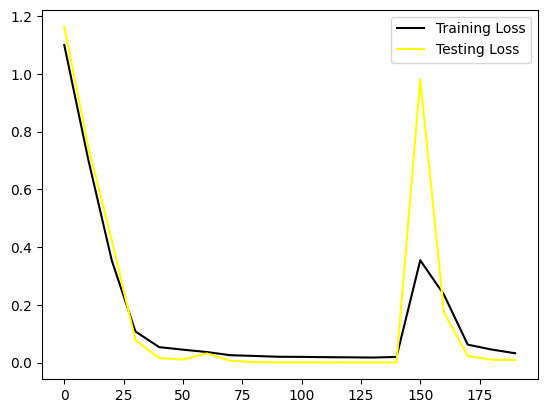

In [303]:
plt.plot(epoch_count,train_loss_list,c='black',label="Training Loss")
plt.plot(epoch_count,test_loss_list,c='yellow',label="Testing Loss")
plt.legend()

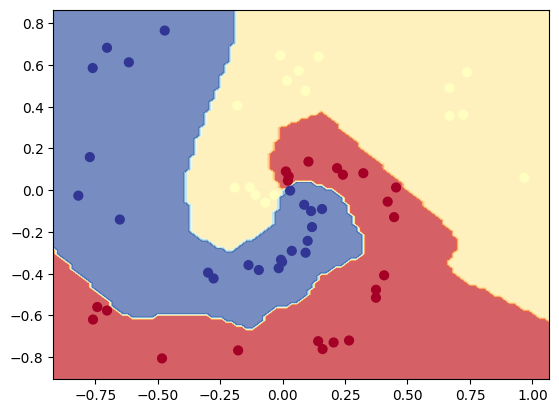

In [305]:
plot_boundary(model_5,X_test,y_test)